# Capstone_Project
## IBM - Data Science - Course 9

### By: DBWaller


### Week 3 
### Peer-graded Assignment: Segmenting and Clustering Neighborhoods in Toronto

#### Initial version: 11/2019

 <div class="alert alert-info" role="alert">

### Part 1

 For this assignment, you will be required to explore and cluster the neighborhoods in Toronto.
 
 ---------------------------------------------------
 
 1)  Start by creating a new Notebook for this assignment.

---------------------------------------------------

 2)  Use the Notebook to build the code to scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, 

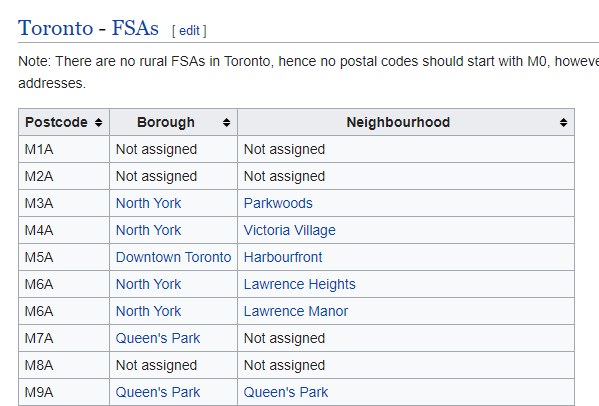

</div>

<div class="alert alert-info" role="alert">

(cont.)
in order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe like the one shown below:
 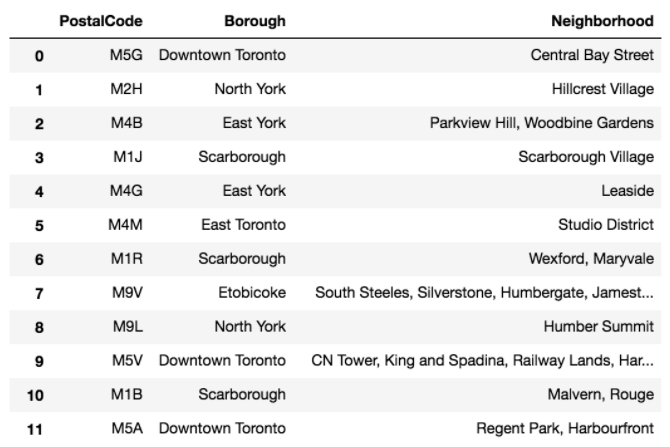
 


---------------------------------------------------
3) To create the above dataframe:

 - The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood.   
 

 - Only process the cells that have an assigned borough.   

  Ignore cells with a borough that is Not assigned.


- More than one neighborhood can exist in one postal code area.    
For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.   


- If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.   
So for the 9th cell in the table on the Wikipedia page, the value of the Borough and the Neighborhood columns will be Queen's Park. 


- Clean your Notebook and add Markdown cells to explain your work and any assumptions you are making.   


- In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.  



---------------------------------------------------
4) 
Note: There are different website scraping libraries and packages in Python. For scraping the above table, you can simply use pandas to read the table into a pandas dataframe.

Another way, which would help to learn for more complicated cases of web scraping is using the BeautifulSoup package. Here is the package's main documentation page: http://beautiful-soup-4.readthedocs.io/en/latest/

The package is so popular that there is a plethora of tutorials and examples on how to use it. Here is a very good Youtube video on how to use the BeautifulSoup package: https://www.youtube.com/watch?v=ng2o98k983k

Use pandas, or the BeautifulSoup package, or any other way you are comfortable with to transform the data in the table on the Wikipedia page into the above pandas dataframe.

</div>

###  **1) First, let's download the libraries required:**

In [1]:
import numpy as np


# PandaS: library for dataframe analysis
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)



# library to handle JSON files
import json 


#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [2]:
!pip install beautifulsoup4
!pip install lxml
!pip install html5lib
!pip install geocoder

    Running setup.py install for future: started
    Running setup.py install for future: finished with status 'done'


###  **2) Load and explore data scrapped:**

In [4]:
# Extracting data..
!wget -q -O 'toronto_data' https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M
print('Data downloaded!')

Data downloaded!


'wget' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
#The last way did not worked.
# Another way:

!pip install wget
import wget
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
filename = wget.download(url)


100% [..............................................................................] 78859 / 78859

**Load and explore the data available:**

In [28]:
#Read wikipedia html page
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M', header=0)
df
#1st line appears
#Let's check of there is other columns


[    Postcode           Borough  \
 0        M1A      Not assigned   
 1        M2A      Not assigned   
 2        M3A        North York   
 3        M4A        North York   
 4        M5A  Downtown Toronto   
 5        M6A        North York   
 6        M6A        North York   
 7        M7A      Queen's Park   
 8        M8A      Not assigned   
 9        M9A      Queen's Park   
 10       M1B       Scarborough   
 11       M1B       Scarborough   
 12       M2B      Not assigned   
 13       M3B        North York   
 14       M4B         East York   
 15       M4B         East York   
 16       M5B  Downtown Toronto   
 17       M5B  Downtown Toronto   
 18       M6B        North York   
 19       M7B      Not assigned   
 20       M8B      Not assigned   
 21       M9B         Etobicoke   
 22       M9B         Etobicoke   
 23       M9B         Etobicoke   
 24       M9B         Etobicoke   
 25       M9B         Etobicoke   
 26       M1C       Scarborough   
 27       M1C       

In [26]:
type(df)

list

In [29]:
df[0]

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor
7,M7A,Queen's Park,Not assigned
8,M8A,Not assigned,Not assigned
9,M9A,Queen's Park,Queen's Park


In [30]:
df[1]

,Unnamed: 0,Canadian postal codes,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,NL NS PE NB QC ON MB SK AB BC NU/NT YT A B C E...,NL NS PE NB QC ON MB SK AB BC NU/NT YT A B C E...,NL NS PE NB QC ON MB SK AB BC NU/NT YT A B C E...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NL,NS,PE,NB,QC,QC,QC,ON,ON,ON,ON,ON,MB,SK,AB,BC,NU/NT,YT
2,A,B,C,E,G,H,J,K,L,M,N,P,R,S,T,V,X,Y


In [34]:
# df[0] is the information we need to proceed..

dfs=df[0]
dfs

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor
7,M7A,Queen's Park,Not assigned
8,M8A,Not assigned,Not assigned
9,M9A,Queen's Park,Queen's Park


### 1) Delete rows with a borough that is Not assigned.

In [49]:


df = dfs[dfs.Borough != 'Not assigned']
df

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor
7,M7A,Queen's Park,Not assigned
9,M9A,Queen's Park,Queen's Park
10,M1B,Scarborough,Rouge
11,M1B,Scarborough,Malvern
13,M3B,North York,Don Mills North


#### 2) Neighbourhoods that are Not assigned

In [61]:

# Create a new dataframe based on Neighbourhoods that are Not assigned

df_b = df.loc[ df['Neighbourhood']== 'Not assigned']

#Replace Not assigned Neighbourhoods column values with the value from Borough
for i in df_b.index:
    df_b.at[i, 'Neighbourhood'] = df_b.at[i, 'Borough']


In [54]:
df_b.index.values[0]

7

In [55]:
df_b

,Postcode,Borough,Neighbourhood
7,M7A,Queen's Park,Queen's Park


In [58]:
#Replace rows in original dataframe
df.loc[df_b.index] = df_b
df

c:\users\dalciana\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor
7,M7A,Queen's Park,Queen's Park
9,M9A,Queen's Park,Queen's Park
10,M1B,Scarborough,Rouge
11,M1B,Scarborough,Malvern
13,M3B,North York,Don Mills North


#### 3) Group by postcode and Borough, keeping all the Neighbourhoods

In [59]:
#Group by postcode and Borough, keeping all the Neighbourhoods
df=df.groupby(['Postcode','Borough'])['Neighbourhood'].apply(lambda x: ','.join(x.astype(str))).reset_index()

#print df
df
    

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge,Malvern"
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union"
2,M1E,Scarborough,"Guildwood,Morningside,West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park"
7,M1L,Scarborough,"Clairlea,Golden Mile,Oakridge"
8,M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff,Cliffside West"


In [60]:
df.shape

(103, 3)

<div class="alert alert-info" role="alert">

## Part 2

Now that you have built a dataframe of the postal code of each neighborhood along with the borough name and neighborhood name, in order to utilize the Foursquare location data, we need to get the latitude and the longitude coordinates of each neighborhood.

In an older version of this course, we were leveraging the Google Maps Geocoding API to get the latitude and the longitude coordinates of each neighborhood. However, recently Google started charging for their API: http://geoawesomeness.com/developers-up-in-arms-over-google-maps-api-insane-price-hike/, so we will use the Geocoder Python package instead: https://geocoder.readthedocs.io/index.html.

The problem with this Package is you have to be persistent sometimes in order to get the geographical coordinates of a given postal code. So you can make a call to get the latitude and longitude coordinates of a given postal code and the result would be None, and then make the call again and you would get the coordinates. So, in order to make sure that you get the coordinates for all of our neighborhoods, you can run a while loop for each postal code. Taking postal code M5G as an example, your code would look something like this:

--------------------------------
import geocoder # import geocoder

##### initialize your variable to None
lat_lng_coords = None

##### loop until you get the coordinates
while(lat_lng_coords is None):
  g = geocoder.google('{}, Toronto, Ontario'.format(postal_code))
  lat_lng_coords = g.latlng

latitude = lat_lng_coords[0]
longitude = lat_lng_coords[1]

-------------------------------------------



Given that this package can be very unreliable, in case you are not able to get the geographical coordinates of the neighborhoods using the Geocoder package, here is a link to a csv file that has the geographical coordinates of each postal code: http://cocl.us/Geospatial_data

Use the Geocoder package or the csv file to create the following dataframe:
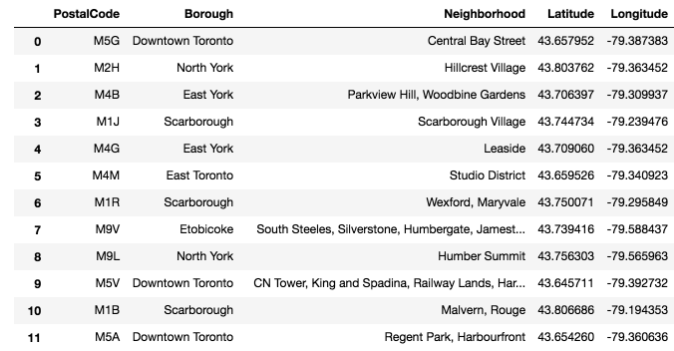

Important Note: There is a limit on how many times you can call geocoder.google function. It is 2500 times per day. This should be way more than enough for you to get acquainted with the package and to use it to get the geographical coordinates of the neighborhoods in the Toronto.

Once you are able to create the above dataframe, submit a link to the new Notebook on your Github repository. (2 marks)
</div>

In [62]:
#Read and load into df locations of Toronto postal codes
pc_lat_lon = pd.read_csv('https://cocl.us/Geospatial_data', header=0)
pc_lat_lon.rename(columns={'Postal Code':'Postcode'}, inplace=True)

#Merge postal codes list within Borough & Neigbourhood data frame
pc_bn_lat_lon=pd.merge(df,pc_lat_lon, on='Postcode')

#Print dataframe
pc_bn_lat_lon

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea,Golden Mile,Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff,Cliffside West",43.692657,-79.264848
